#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem
Thomas Heim     Brukernavn: thomheim

## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 28 2025, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [57]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


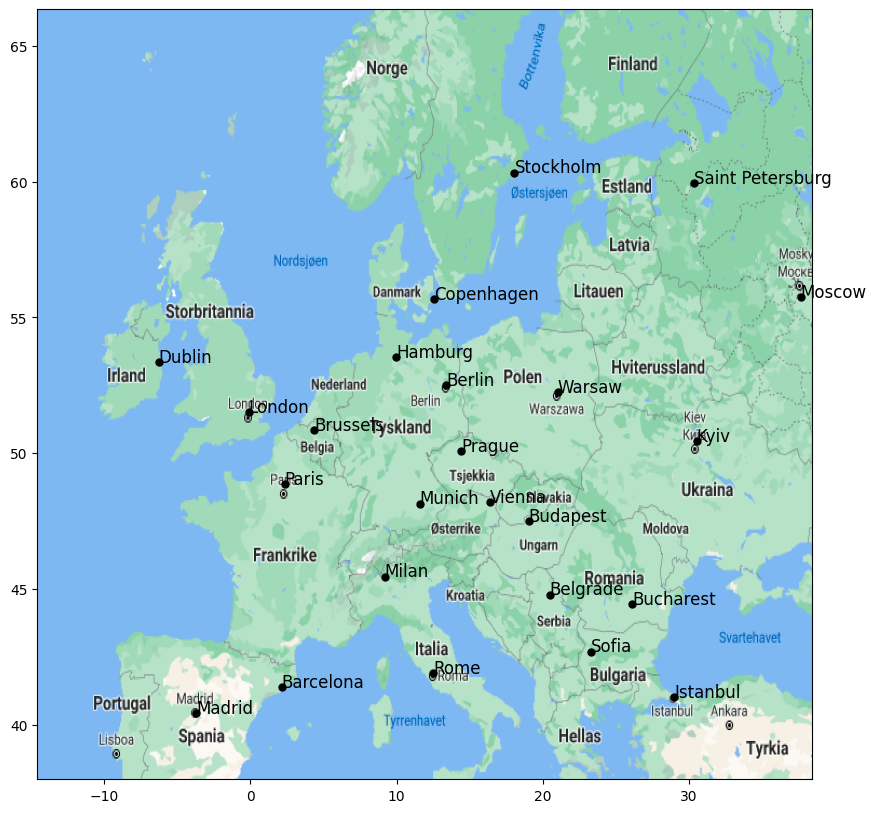

In [58]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [59]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


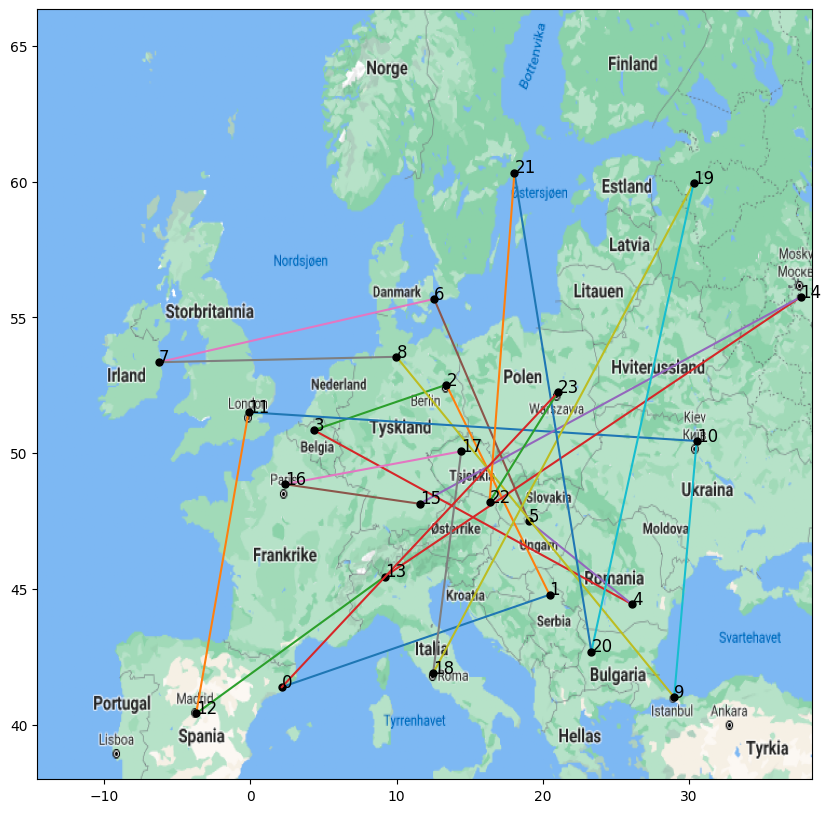

In [60]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

6 CITY RESULTS:
Best tour: ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels']
Distance: 5018.8100 km
Time taken: 0.00019908 seconds


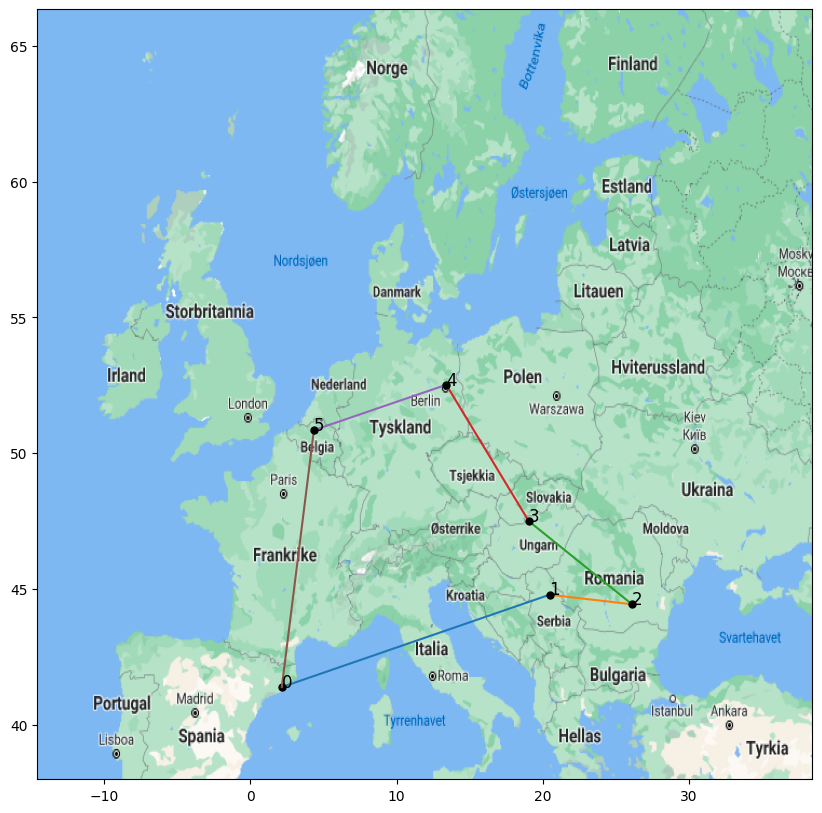

7 CITY RESULTS:
Best tour: ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels']
Distance: 5487.8900 km
Time taken: 0.00098014 seconds
8 CITY RESULTS:
Best tour: ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Dublin']
Distance: 6667.4900 km
Time taken: 0.00771618 seconds
9 CITY RESULTS:
Best tour: ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin']
Distance: 6678.5500 km
Time taken: 0.06742406 seconds

10 CITY RESULTS:
Best tour: ['Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin']
Distance: 7486.3100000000 km
Time taken: 0.6556532383 seconds


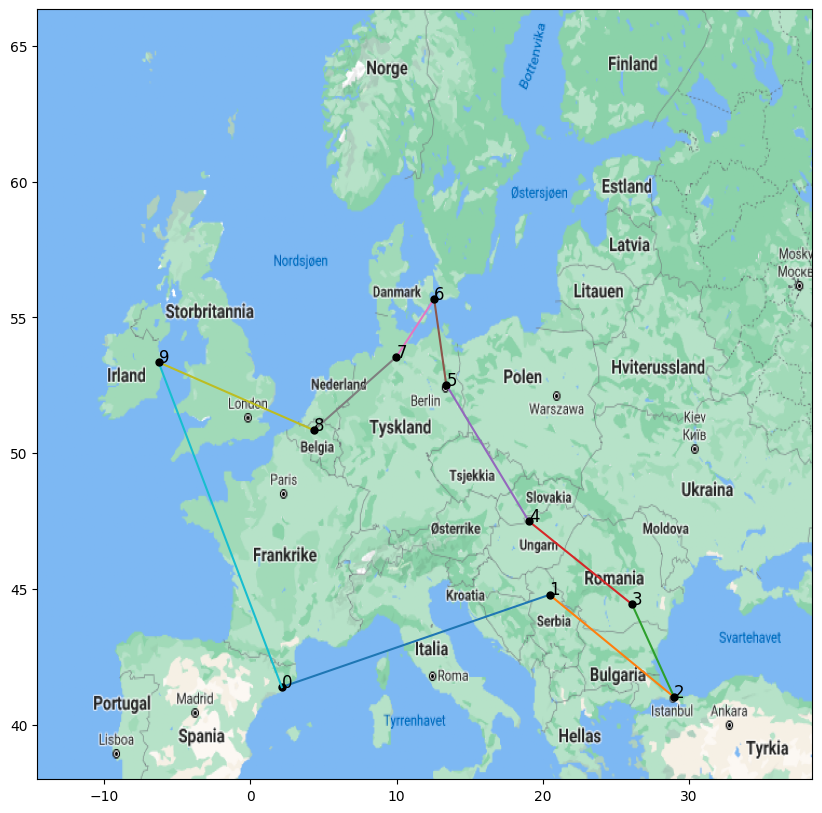

In [67]:
# Implement the algorithm here

import itertools  # For generating permutations of cities
import time       # For measuring computation time
import csv        # For reading the city distance data

# Read city distances from the CSV file
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))  # Parse CSV into a list of lists
    cities = data[0]  # First row contains city names

# Function to get the total distance of a tour
def get_tour_distance(tour, data):
    """
    Finding the total distance of a tour by fetching pre-calculated distances from the data.
    Args:
        tour (list): A list of city indices representing the tour.
        data (list): The distance matrix from the CSV file.
    Returns:
        float total_distance: The total distance of the tour in km.
    """
    total = 0.0
    for i in range(len(tour)):
        j = (i + 1) % len(tour)  # Wrap around to the first city
        # Fetch the distance between current city and next city
        # +1 because data[0] is the header row
        total += float(data[tour[i]+1][tour[j]])  
    return total

# Function to perform exhaustive search
def exhaustive_search(num_cities):
    """
    Perform an exhaustive search to find the shortest tour among a subset of cities.
    Args:
        num_cities (int): The number of cities to include in the search.
    Returns:
        list best_tour_names: The best tour as a list of city names.
        float min_distance: The total distance of the best tour in kilometers.
        float time_taken: The time taken to find the best tour in seconds.
    """
    start_time = time.time()  # Start timing
    best_tour = None          # Store the best tour found
    min_distance = float('inf')  # Initialize with a large value

    # Generate permutations of city indices (0 to num_cities-1)
    # Fix the first city to reduce computation by a factor of N
    first_city = 0
    other_cities = [i for i in range(1, num_cities)]  # Remaining cities

    # Iterate through all permutations of the remaining cities
    for perm in itertools.permutations(other_cities):
        current_tour = [first_city] + list(perm)  # Add the fixed first city
        current_distance = get_tour_distance(current_tour, data)  # Get tour distance

        # Update the best tour if the current one is better
        if current_distance < min_distance:
            min_distance = current_distance
            best_tour = current_tour

    time_taken = time.time() - start_time  # Calculate total time
    # Convert city indices to city names for readability
    best_tour_names = [cities[i] for i in best_tour]
    return best_tour_names, min_distance, time_taken

# Run exhaustive search for 6 cities
best_tour_6, distance_6, time_6 = exhaustive_search(6)
print("6 CITY RESULTS:")
print(f"Best tour: {best_tour_6}")
print(f"Distance: {distance_6:.4f} km")
print(f"Time taken: {time_6:.8f} seconds")
plot_plan(best_tour_6)  # Visualize the best tour

#Run exhaustive search for 7 cities
best_tour_7, distance_7, time_7 = exhaustive_search(7)
print("7 CITY RESULTS:")
print(f"Best tour: {best_tour_7}")
print(f"Distance: {distance_7:.4f} km")
print(f"Time taken: {time_7:.8f} seconds")

# Run exhaustive search for 8 cities
best_tour_8, distance_8, time_8 = exhaustive_search(8)
print("8 CITY RESULTS:")
print(f"Best tour: {best_tour_8}")
print(f"Distance: {distance_8:.4f} km")
print(f"Time taken: {time_8:.8f} seconds")

# Run exhaustive search for 9 cities
best_tour_9, distance_9, time_9 = exhaustive_search(9)
print("9 CITY RESULTS:")
print(f"Best tour: {best_tour_9}")
print(f"Distance: {distance_9:.4f} km")
print(f"Time taken: {time_9:.8f} seconds")

# Run exhaustive search for 10 cities
best_tour_10, distance_10, time_10 = exhaustive_search(10)
print("\n10 CITY RESULTS:")
print(f"Best tour: {best_tour_10}")
print(f"Distance: {distance_10:.10f} km")
print(f"Time taken: {time_10:.10f} seconds")
plot_plan(best_tour_10)  # Visualize the best tour


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

**1. SHORTEST TOUR FOR 10 CITIES**


**Question:**  
What is the shortest tour (sequence and length) for the first 10 cities?  

**Answer:**  
The optimal tour and its distance are calculated by `exhaustive_search(10)`.  

**Output from running the code:**  
- **Best tour:** [Barcelona, Brussels, Berlin, Belgrade, Budapest, Bucharest, Sofia, Istanbul, Kyiv, Moscow]  
- **Distance:** 7486.3100000000 km  
- **Computation time:** 0.6556532383 seconds (The time for running it varies a little bit from run to run.)

---

**2. TIME ESTIMATE FOR 24 CITIES** 

**Question:**  
How long would exhaustive search take for all 24 cities?  

**Answer:**  
We estimate the time by scaling the 10-city results to 24 cities.  

- Permutations for 10 cities (9!): 362,880
- Time per permutation: 0.65s / 362,880 ≈ 1.794 × 10⁻⁶ s
- Permutations for 24 cities (23!): 2.585 × 10²²
- Total time: (1.794 × 10⁻⁶ s) × (2.585 × 10²²) ≈ 4.83 × 10¹⁶ s
- Years: 4.83 × 10¹⁶ s / 31,557,600 s/year ≈ 1.469 × 10⁹ years

Estimated computation time: 1,469,000,000 years (this number is huge and might change based on diffrent factors, but we see here that its going ta take a loooooooooooooong time to run 24 cites.)

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 


##### Answer to Question

**Question**: 
**How well does the hill climber perform, compared to the result from the exhaustive search for the first 10 cities?**  

**Answer**
- Both algorithms found the same optimal distance: **7486.31 km**.  
- This means Hill Climbing was able to find the globally optimal solution in at least one of the 20 runs. 
  
**Performance Comparison 10 cities**  
- **Hill Climbing**: **0.02 seconds seconds**  
- **Exhaustive Search**: **0.65 seconds**  
- Hill Climbing was faster than Exhaustive Search.  
    

Number of cities in CSV: 24

Running Hill Climbing for 10 cities...
Time taken: 0.02 seconds

10 CITY RESULTS:
Best tour distance: 7486.31 km
Worst tour distance: 8346.94 km
Mean tour distance: 7593.93 km
Standard deviation: 203.25 km

Plotting best tour (distance: 7486.31 km)


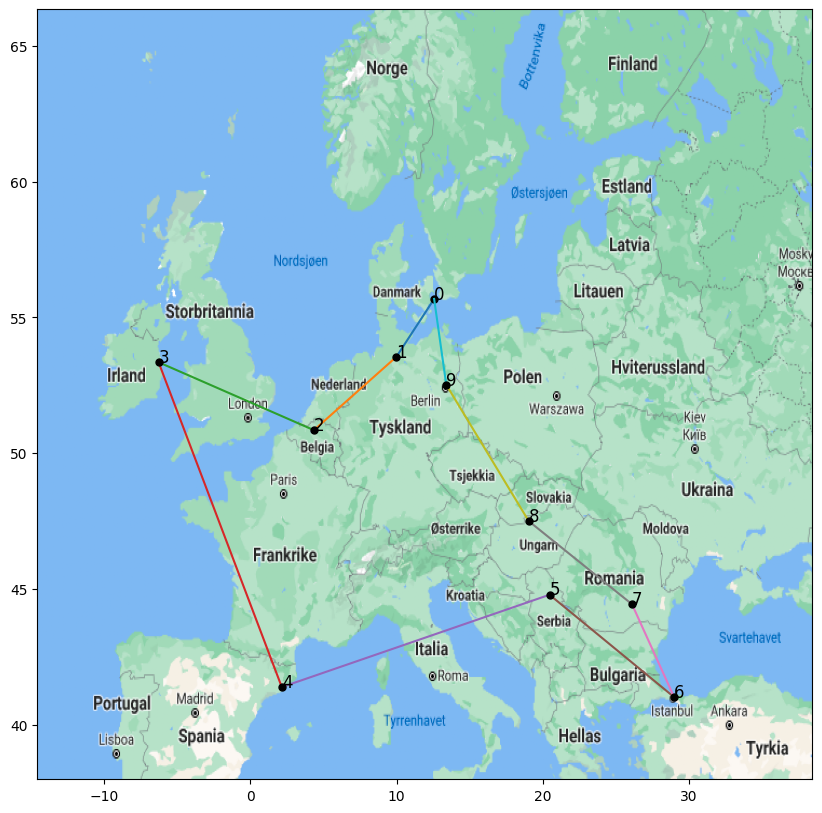


Running Hill Climbing for 24 cities...
Time taken: 0.58 seconds

24 CITY RESULTS:
Best tour distance: 12612.03 km
Worst tour distance: 15018.97 km
Mean tour distance: 13866.88 km
Standard deviation: 589.01 km

Plotting best tour (distance: 12612.03 km)


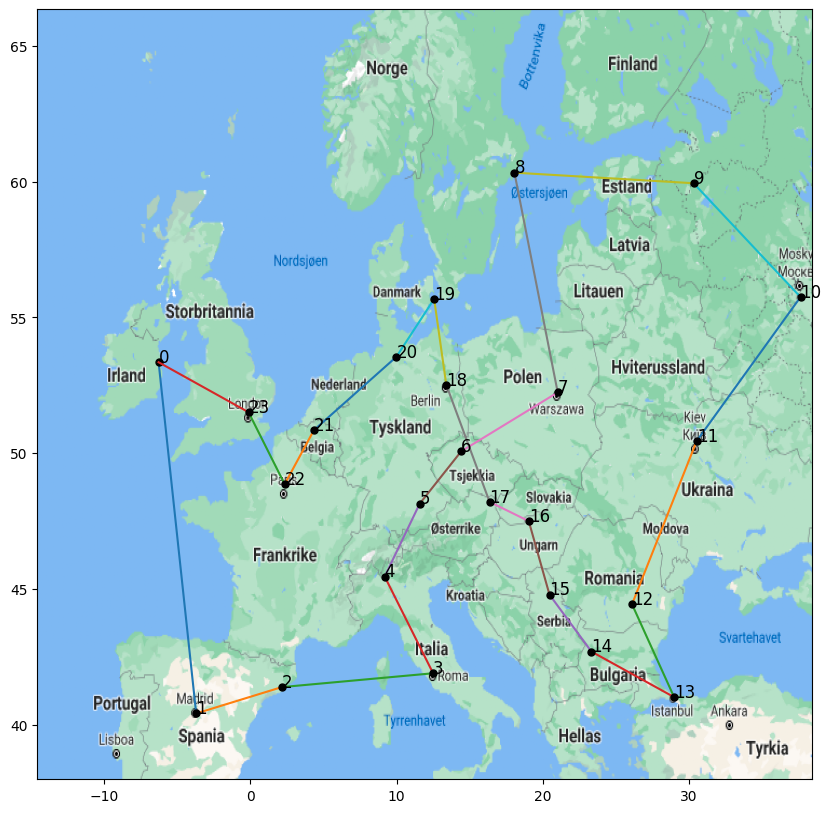

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from time import time

def read_city_data(file_path):
    """
    Reads city data form a CSV file and returns cities, distances, and number of cities.append
    Args:
        file_path(str): Path to the CSV file containg city distances.
    Returns:
        tuple: (cities, distances, num_cities) where:
        - cites (list): List of city names.
        - distances (list): 2D list of ditances between cities.
    """
    with open(file_path, "r") as f:
        data = list(csv.reader(f, delimiter=';'))
        cities = data[0] # First row contains city names
        # Convert distances to floats, defaulting to 0 for empty cells.
        distances = [[float(x) if x else 0 for x in row] for row in data[1:]]
        num_cities = len(cities)
        print(f"Number of cities in CSV: {num_cities}")
        return cities, distances, num_cities

def tour_distance(tour, distances):
    """
    Find the total distance of a tour by summing the distances between consecutive cities.
    Args:
        tour(list): List of city indices representing the tour.
        distances(list): 2D list of distances between cities.
    Return:
        float: Total ditance of the tour in km. 
    """
    total = 0.0
    for i in range(len(tour)):
        j = (i + 1) % len(tour) # Wrap around to the first city. 
        total += distances[tour[i]][tour[j]]
    return total

# Generate a random tour by shuffling the city indices.
def generate_random_tour(num_cities):
    return np.random.permutation(num_cities)

def generate_neighbors(tour):
    """
    Generates all possible neighbors of a tour by swapping two cities.
    Args:
        tour(list): List of city representing the tour.
    Returns:
        neighbors(list): List of neighboring tours. 
    """
    neighbors = []
    for i in range(len(tour)):
        for j in range(i + 1, len(tour)):
            neighbor = tour.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i] # Swap two cities. 
            neighbors.append(neighbor)
    return neighbors

def hill_climbing(num_cities, distances, cities, max_iterations=1000):
    """
    Perform hill climbing to find the shortest tour.
    Args:
        num_cities(int): Number of cities.
        distences (list): 2D list of ditances between cities.
        cities(list): Maximum number of iterations to run.
    Returns:
        - best_tour(list): The best tour found.
        - best_distance(float): The distance of the best tour.
    """
    current_tour = generate_random_tour(num_cities)
    current_distance = tour_distance(current_tour, distances)
    
    best_tour = current_tour.copy()
    best_distance = current_distance
    
    for _ in range(max_iterations):
        neighbors = generate_neighbors(current_tour)
        best_neighbor = None
        best_neighbor_distance = float('inf')
        # Find the best neighbor. 
        for neighbor in neighbors:
            neighbor_distance = tour_distance(neighbor, distances)
            if neighbor_distance < best_neighbor_distance:
                best_neighbor = neighbor
                best_neighbor_distance = neighbor_distance
        # Stop if no better neighbor is found.
        if best_neighbor_distance >= current_distance:
            break
            
        current_tour = best_neighbor
        current_distance = best_neighbor_distance
        # Update the best tour if the current one is better. 
        if current_distance < best_distance:
            best_tour = current_tour.copy()
            best_distance = current_distance
    
    return [cities[i] for i in best_tour], best_distance

def run_hill_climbing_experiments(num_cities, distances, cities, runs=20):
    """
    Run hill climbing experiments multiple times and collect results.
    Args:
        num_cites(int): Number of cities.
        distances(list): 2D list of ditances between cities.
        cities(list): List of city names.
    Returns:
        results(list): List of tuples containg (best_tour, best_distance) for each run. 
    """
    results = []
    print(f"\nRunning Hill Climbing for {num_cities} cities...")
    start_time = time()
    
    for i in range(runs):
        best_tour, best_distance = hill_climbing(num_cities, distances, cities)
        results.append((best_tour, best_distance))
        
    time_taken = time() - start_time
    print(f"Time taken: {time_taken:.2f} seconds")
    
    return results

def print_results(results, num_cities):
    """
    Print statistics for hill climning results.
    Args:
        results(list): List of tuples containing(best_tour,best_distance)
        num_cities(int): Number of cities. 
    """
    distances = [r[1] for r in results]
    
    print(f"\n{num_cities} CITY RESULTS:")
    print("=" * 50)
    print(f"Best tour distance: {min(distances):.2f} km")
    print(f"Worst tour distance: {max(distances):.2f} km")
    print(f"Mean tour distance: {np.mean(distances):.2f} km")
    print(f"Standard deviation: {np.std(distances):.2f} km")
    print("=" * 50)
    
    # Plot one of the best tours
    best_idx = np.argmin(distances)
    best_tour = results[best_idx][0]
    print(f"\nPlotting best tour (distance: {distances[best_idx]:.2f} km)")
    plot_plan(best_tour)

def main():
    """
    Main function to run hill climbing experiemnts for 10 and 24 cities. 
    """
    cities, distances, _ = read_city_data("european_cities.csv")
    
    # Run experiments for 10 cities
    results_10 = run_hill_climbing_experiments(10, distances, cities)
    print_results(results_10, 10)
    
    # Run experiments for 24 cities
    results_24 = run_hill_climbing_experiments(24, distances, cities)
    print_results(results_24, 24)

if __name__ == "__main__":
    main()

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

##### Answer to Question
**Question**: Conclude which is best in terms of tour length and number of generations of evolution time.

**Answer**: 
Parmaters and Assumptions:
- Population sizes tested: 20, 50 and 100. 
- Number of generations: 200 for all population sizes.
- Selection: Tournament selection with tournament size of 3.
- Crossover rate: 0.8 (80% chance of crossover)
- Mutation rate: 0.1 (10% chance of mutation)
- Each experiment was run 20 times. 

Based on the fitnes evolution lots, I have observed a few patterns:
For 10 cites, all population sizes (20,50,100) where able to find the shortes tours. However, with 24 cites, population size 100 found shorter tours than the smaler populations, though it took more generations to reach these solutuins. The populations size 20 and 50 evolved faster, but they ofte got stuck with longer tour lengths for the 24-city problem. 

So this suggest that larger populations become more important when the problem size increases, depsite requiring more time. 

Note: I see that the best tour distance can varie a bit from run to run, and I think is because of different mutations, as we would expect.

Running 10-city experiments...
Population 20 done in 1.19s
Population 50 done in 3.26s
Population 100 done in 6.59s

10 CITY RESULTS

Population Size = 20:
  Best tour distance: 7486.31 km
  Worst tour distance: 8407.18 km
  Mean tour distance: 7790.57 km
  Standard deviation: 361.16 km

Population Size = 50:
  Best tour distance: 7486.31 km
  Worst tour distance: 7737.95 km
  Mean tour distance: 7530.77 km
  Standard deviation: 87.37 km

Population Size = 100:
  Best tour distance: 7486.31 km
  Worst tour distance: 7737.95 km
  Mean tour distance: 7500.57 km
  Standard deviation: 54.69 km

PLOTTING OPTIMIZED TOURS FOR 10 CITIES

Best tour for population size 20:


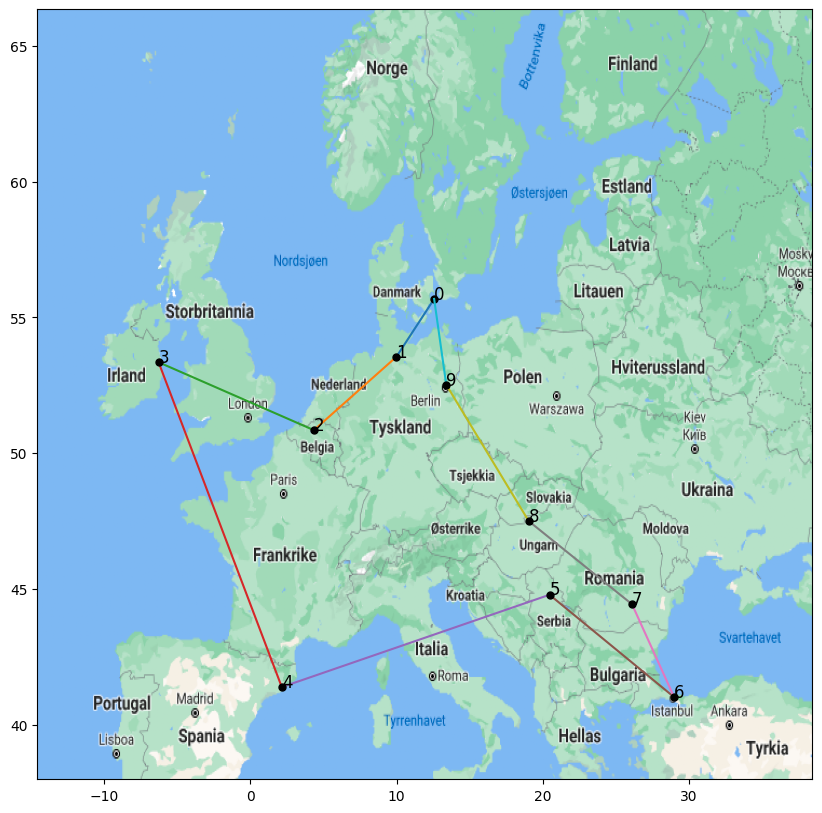


Best tour for population size 50:


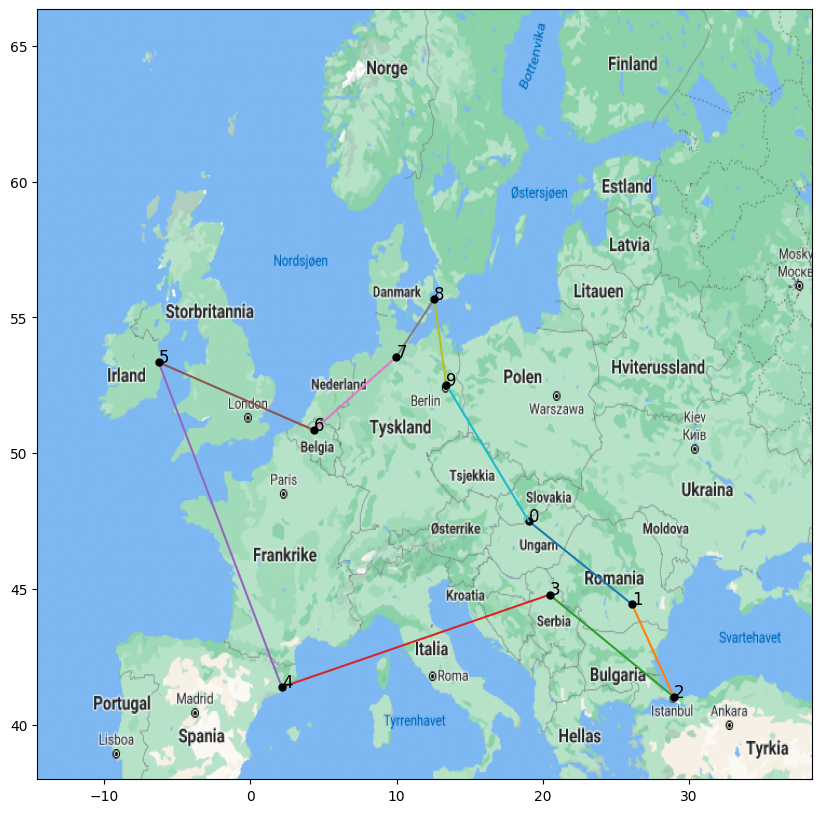


Best tour for population size 100:


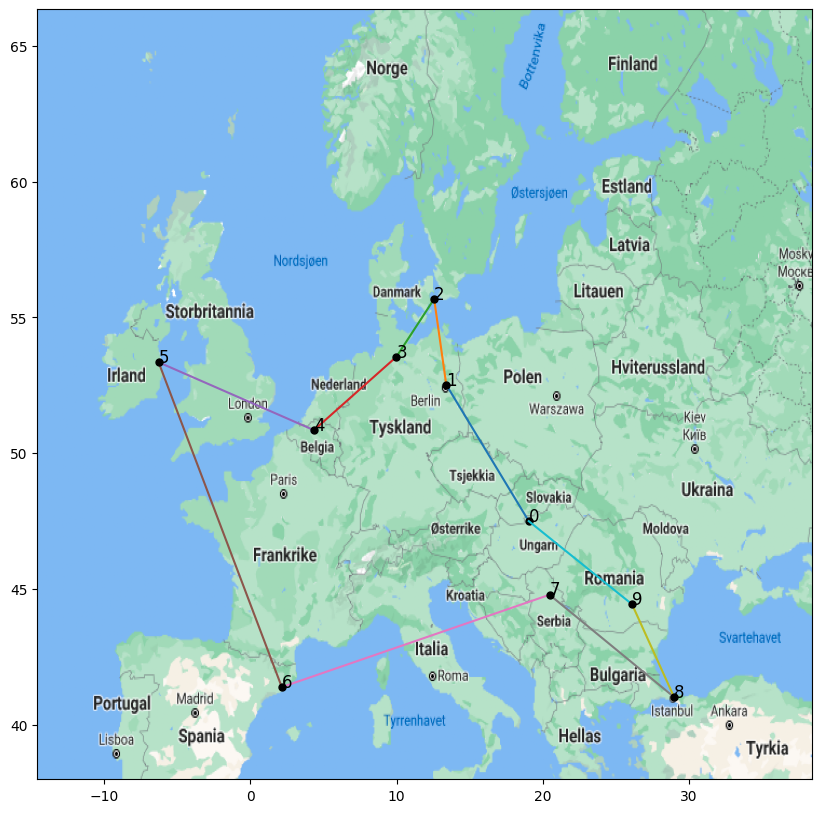


10 CITY FITNESS EVOLUTION


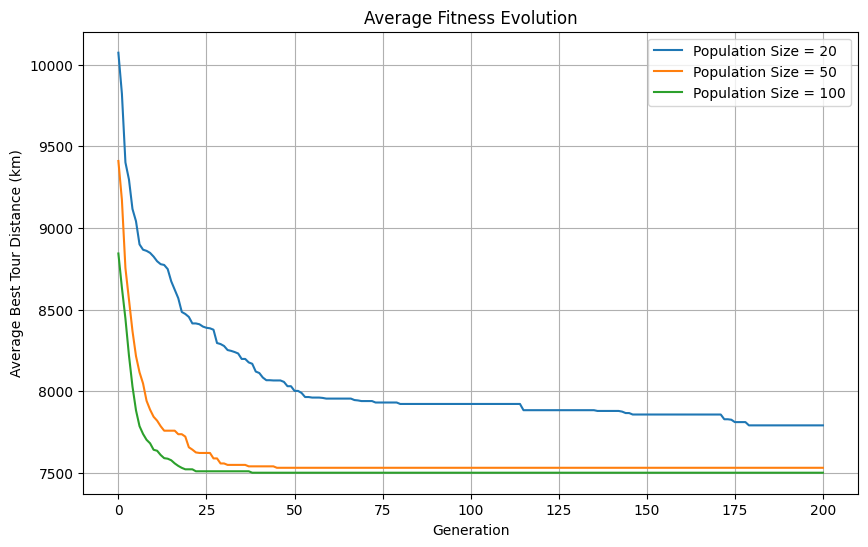


Running 24-city experiments...
Population 20 done in 1.83s
Population 50 done in 5.14s
Population 100 done in 10.22s

24 CITY RESULTS

Population Size = 20:
  Best tour distance: 14806.38 km
  Worst tour distance: 18863.39 km
  Mean tour distance: 16885.64 km
  Standard deviation: 1073.39 km

Population Size = 50:
  Best tour distance: 12792.80 km
  Worst tour distance: 17129.87 km
  Mean tour distance: 15004.70 km
  Standard deviation: 1070.67 km

Population Size = 100:
  Best tour distance: 12325.93 km
  Worst tour distance: 15148.47 km
  Mean tour distance: 14074.40 km
  Standard deviation: 747.59 km

PLOTTING OPTIMIZED TOURS FOR 24 CITIES

Best tour for population size 20:


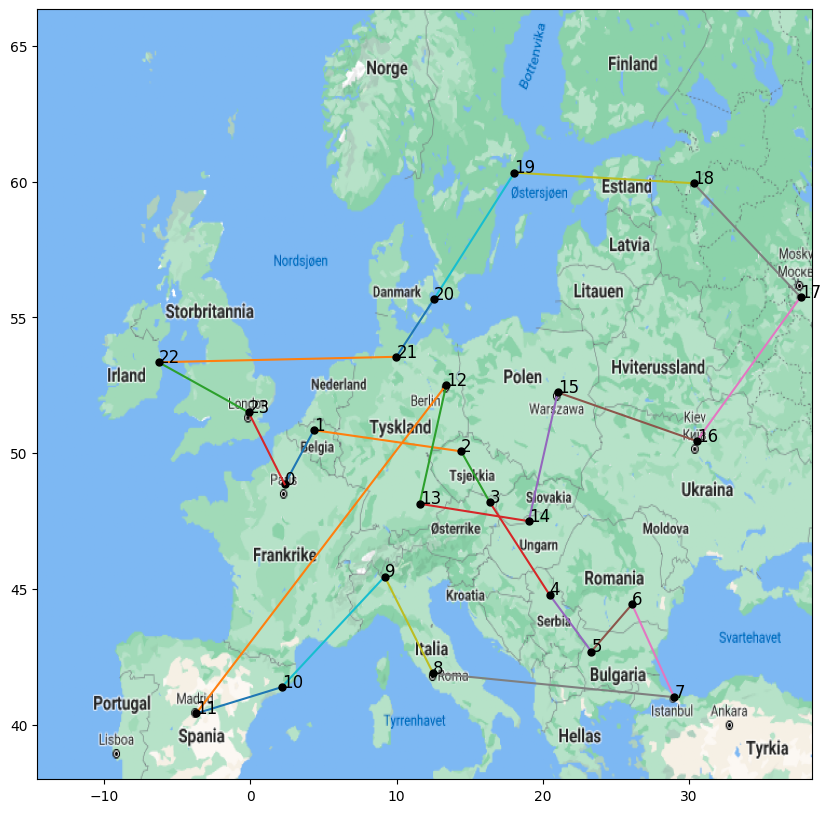


Best tour for population size 50:


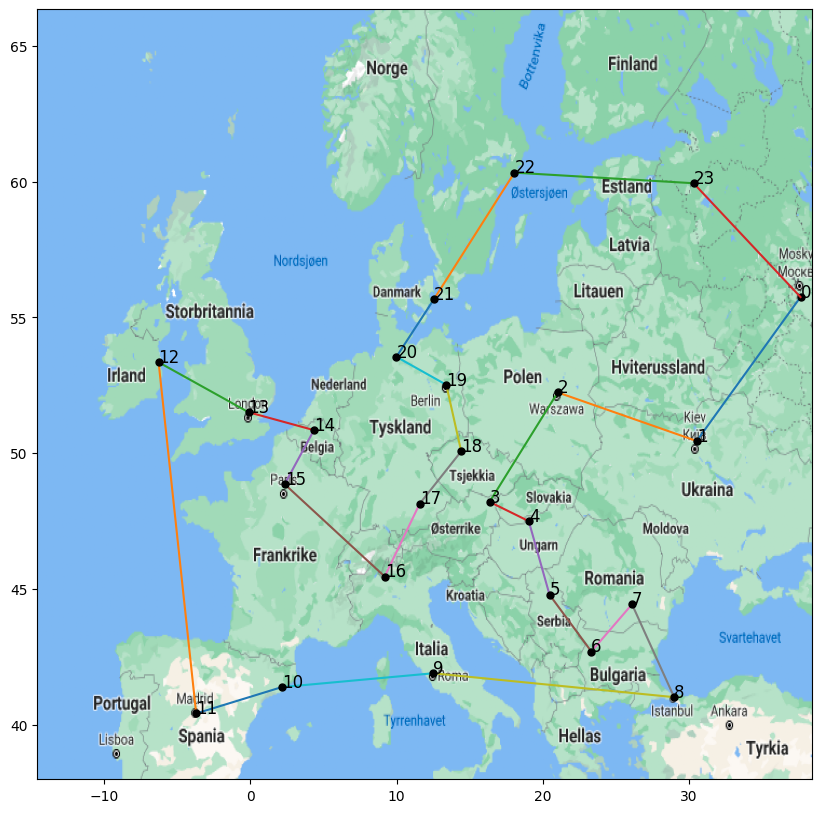


Best tour for population size 100:


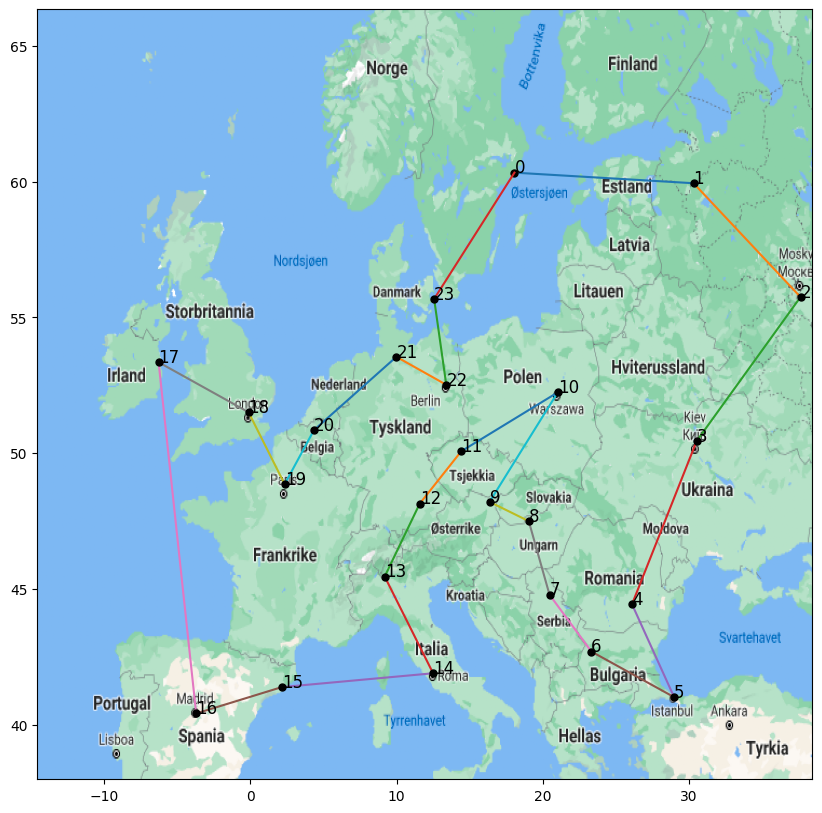


24 CITY FITNESS EVOLUTION


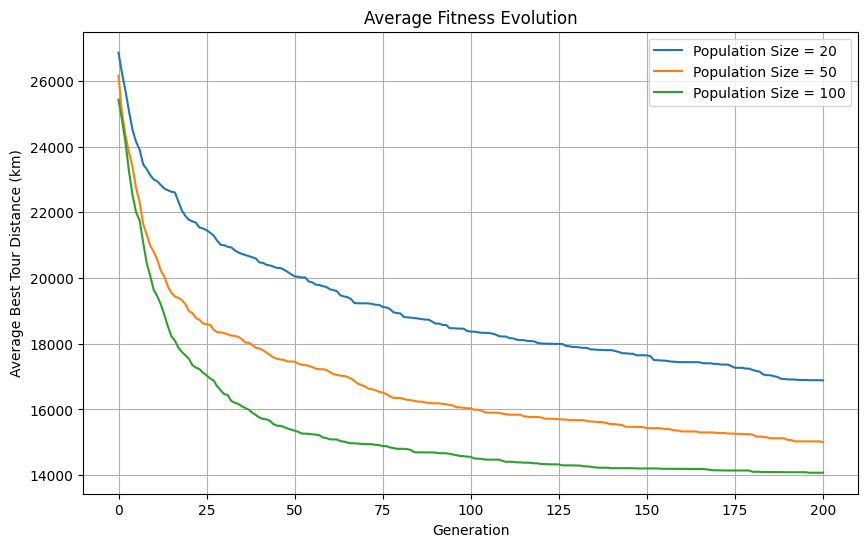

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from time import time

# Read city data
def read_city_data(file_path):
    """
    Reads city data from CSV file and returns cites, distances and number of cities.
    Args:
        file_path(str): Path to the CSV file containing city distances.
    Returns:
        tuple: (cities, distances, num_cities) where:
        - cities (list): List of city names.
        - distances (list): 2D list of distances between cities.
        - num_cities (int): Number of cities.
    """
    with open(file_path, "r") as f:
        data = list(csv.reader(f, delimiter=';'))
        cities = data[0]
        distances = [[float(x) if x else 0 for x in row] for row in data[1:]]
        num_cities = len(cities)
        return cities, distances, num_cities

# Calculate tour distance
def tour_distance(tour, distances):
    """
    Calculate the total distance of a given tour.
    Args:
        tour(list): List of citys representing the tour.
        distances(list): 2D list of distances between cities.
    Returns:
        float: Total distance of the tour in km. 
    """
    total = 0.0
    for i in range(len(tour)):
        j = (i + 1) % len(tour)
        total += distances[tour[i]][tour[j]]
    return total

# Generate population
def generate_population(pop_size, num_cities):
    """
    Generates a population of random tours.
    """
    return np.array([np.random.permutation(num_cities) for _ in range(pop_size)])

# Partially Mapped Crossover (PMX)
def pmx_crossover(p1, p2):
    """
    Performs Partially Mapped Crossover (PMX) on two parent tours.
    Args:
        p1(list): First parent tour.
        p2(list): Second parent tour. 
    Returns:
        tuple: Two child tour generated by PMX. 
    """
    size = len(p1)
    c1, c2 = [-1] * size, [-1] * size # Start with placeholder values. 
    start, end = sorted(np.random.choice(size, 2, replace=False)) # Randomly select crossover segmnet. 
    c1[start:end+1] = p1[start:end+1] # Copy segemnt form parent 1 to child 1.
    c2[start:end+1] = p2[start:end+1] # Copy segment form parent 2 to child 2

    # Create mapping dictionaries to handle conflicts.
    mapping1 = dict(zip(p1[start:end+1], p2[start:end+1]))
    mapping2 = dict(zip(p2[start:end+1], p1[start:end+1]))

    # Fill in the remaing positions in the child tours
    for i in range(size):
        if i < start or i > end:
            n1 = p2[i]
            while n1 in c1: # Resolve conflicts using the mapping. 
                n1 = mapping1[n1]
            c1[i] = n1
            n2 = p1[i]
            while n2 in c2: # Resolve conflicts using the mapping. 
                n2 = mapping2[n2]
            c2[i] = n2
    return np.array(c1), np.array(c2)

# Swap mutation
def swap_mutation(tour):
    """
    Performs swap mutation on a tour by swapping two random cities.
    Args:
        tour(list): Tour to mutate.
    Returns:
        list: Mutated tour. 
    """
    mutated = tour.copy()
    i, j = np.random.choice(len(tour), 2, replace=False) # Randomly select two cities to swap. 
    mutated[i], mutated[j] = mutated[j], mutated[i] # Swap the cities. 
    return mutated

# Genetic Algorithm
def run_ga(num_cities, pop_size, gens=200, runs=20):
    """
    Run a Genetic Algorithm for TSP.
    Args:
        num_cites(int): Number of cities.
        pop_size(int): Size of the population.
        gens(int): Number of generations.
    Returns:
        -all_results(list): List of tuples containg (best_tour, best_distance) for each run.
        -fitness_history(list): List of lists containing the best fitness value for each generation over all runs.
    """
    cities, distances, _ = read_city_data("european_cities.csv")
    all_results = []
    fitness_history = []
    
    for _ in range(runs):
        pop = generate_population(pop_size, num_cities) # Initialize population.
        fitness = np.array([tour_distance(t, distances) for t in pop]) # Calcualte fittnes for each tour.
        best_fitness_history = [np.min(fitness)] # Track the best fitness in each generation.
        
        for _ in range(gens):
            new_pop = []
            elite_size = max(5, pop_size//10) # Finding the top 10% of the population.
            elite_idx = np.argpartition(fitness, elite_size)[:elite_size] # Select elite individuals.
            new_pop.extend(pop[elite_idx]) # Add elite individuals to new population. 
            
            while len(new_pop) < pop_size:
                # Tournament selection: select parents based on fitness. 
                tournament_size = 3
                idx1 = np.random.choice(pop_size, tournament_size, replace=False)
                idx2 = np.random.choice(pop_size, tournament_size, replace=False)
                parent1 = pop[idx1[np.argmin(fitness[idx1])]] # Select best form the tournament. 
                parent2 = pop[idx2[np.argmin(fitness[idx2])]]
                
                if np.random.rand() < 0.8:  # Crossover rate of 80%
                    child1, child2 = pmx_crossover(parent1, parent2)
                else:
                    child1, child2 = parent1.copy(), parent2.copy()
                
                if np.random.rand() < 0.1:  # Mutation rate of 10%
                    child1 = swap_mutation(child1)
                if np.random.rand() < 0.1:
                    child2 = swap_mutation(child2)
                
                new_pop.extend([child1, child2]) # Add children to new population. 
            
            pop = np.array(new_pop[:pop_size]) # Update population. 
            fitness = np.array([tour_distance(t, distances) for t in pop]) # Calculate fitness. 
            best_fitness_history.append(np.min(fitness)) # Track the best fitness in this generation. 
        
        best_idx = np.argmin(fitness) # Find the best tour in the final population.
        all_results.append(([cities[i] for i in pop[best_idx]], fitness[best_idx])) # Stor the best tour and its distances. 
        fitness_history.append(best_fitness_history) # Stor the fitness history. 
    
    return all_results, fitness_history

def print_stats(results):
    """
    Prints statistics (best, worst, mean, standard deviation) of the results.
    Args:
        results(dict): Dictionary of results for different population sizes. 
    """
    print("=" * 50)
    for size in sorted(results.keys()):
        distances = [r[1] for r in results[size][0]] # Get distances form results. 
        print(f"\nPopulation Size = {size}:")
        print(f"  Best tour distance: {min(distances):.2f} km")
        print(f"  Worst tour distance: {max(distances):.2f} km")
        print(f"  Mean tour distance: {np.mean(distances):.2f} km")
        print(f"  Standard deviation: {np.std(distances):.2f} km")
    print("=" * 50)

def plot_fitness_evolution(results):
    """
    Plots the evolution of fitness (best tour distance) over generations.
    Args:
        results(dict): Dictionary of results for different population sizes. 
    """
    plt.figure(figsize=(10, 6))
    for size in results.keys():
        avg_fitness = np.mean(results[size][1], axis=0) # Caulculate average fitness across runs
        plt.plot(avg_fitness, label=f"Population Size = {size}") # Plot fitness evolution. 
    plt.xlabel("Generation")
    plt.ylabel("Average Best Tour Distance (km)")
    plt.title("Average Fitness Evolution")
    plt.legend()
    plt.grid(True)
    plt.show()

def run_experiments():
    """
    Run experiments for 10 and 24 cities with different population sizes. 
    """
    # Run 10-city experiments
    print("Running 10-city experiments...")
    results_10 = {}
    for pop_size in [20, 50, 100]:
        start_time = time()
        results_10[pop_size] = run_ga(10, pop_size)
        print(f"Population {pop_size} done in {time()-start_time:.2f}s")
    
    # Print 10-city stats
    print("\n10 CITY RESULTS")
    print_stats(results_10)
    
    # Plot optimized tours for 10 cities
    print("\nPLOTTING OPTIMIZED TOURS FOR 10 CITIES")
    for pop_size in [20, 50, 100]:
        distances = [r[1] for r in results_10[pop_size][0]]
        best_idx = np.argmin(distances)
        best_tour = results_10[pop_size][0][best_idx][0]
        print(f"\nBest tour for population size {pop_size}:")
        plot_plan(best_tour)
    
    # Print 10-city fitness evolution
    print("\n10 CITY FITNESS EVOLUTION")
    plot_fitness_evolution(results_10)
    
    # Run 24-city experiments
    print("\nRunning 24-city experiments...")
    results_24 = {}
    for pop_size in [20, 50, 100]:
        start_time = time()
        results_24[pop_size] = run_ga(24, pop_size)
        print(f"Population {pop_size} done in {time()-start_time:.2f}s")
    
    # Print 24-city stats
    print("\n24 CITY RESULTS")
    print_stats(results_24)
    
    # Plot optimized tours for 24 cities
    print("\nPLOTTING OPTIMIZED TOURS FOR 24 CITIES")
    for pop_size in [20, 50, 100]:
        distances = [r[1] for r in results_24[pop_size][0]]
        best_idx = np.argmin(distances)
        best_tour = results_24[pop_size][0][best_idx][0]
        print(f"\nBest tour for population size {pop_size}:")
        plot_plan(best_tour)
    
    # Print 24-city fitness evolution
    print("\n24 CITY FITNESS EVOLUTION")
    plot_fitness_evolution(results_24)

if __name__ == "__main__":
    run_experiments()

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

# Answer
**Question 1**: Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

**Answer 1**: GA found the shortest tour for the 10 cites as found as the exhaustive search. Both found the same tour distnace 7486.31 km. 

**Question 2**: For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

**Answer 2**: For GA compared to exhaustive search for 10 cites GA was a little bit slower, but for 24 cites we used ca. 10s for a population of 100 in GA, compared to exhaustive search that would not finish in a really long time (1,469,000,000 years). 

**Question 3**: How many tours were inspected by your GA as compared to by the exhaustive search?

**Answer 3**:
For Exhaustive Search:
- 10 cities: 10! = 3,628,800 tours inspected
- 24 cities: 24! = 6.204484e+23 tours would need to be inspected

For GA:
10 cities:
- Population size 20: 20 individuals × 50 generations = 1,000 tours × 20 runs = 20,000 tours
- Population size 50: 50 individuals × 50 generations = 2,500 tours × 20 runs = 50,000 tours
- Population size 100: 100 individuals × 50 generations = 5,000 tours × 20 runs = 100,000 tours

24 cities:
- Population size 20: 20 individuals × 50 generations = 1,000 tours × 20 runs = 20,000 tours
- Population size 50: 50 individuals × 50 generations = 2,500 tours × 20 runs = 50,000 tours
- Population size 100: 100 individuals × 50 generations = 5,000 tours × 20 runs = 100,000 tours

So we can see here why GA is more effective than exhaustive search since GA inspect a lot fewer tours than exhaustive search. 


## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 3)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [64]:
# Implement algorithm here